# Problem 1 of HW 3
$\newcommand{\Ket}[1]{\left|#1\right>}$
$\newcommand{\Bra}[1]{\left<#1\right|}$

## Part (I)
Suppose we have 4 qubit system with 2 input qubits and 2 output qubits.
Applying $H^{\otimes2}$ operator to input qubits and the $\textit{U}_f$, one will get $\frac{1}{2}\sum_{a=0}^{3} \Ket{a}\Ket{f(a)}$

Next, applying QFT to the output pair of qubits, one will get $\frac{1}{4}\sum_{a=0}^{3}\Ket{a} \sum_{b=0}^{3} \exp{\frac{i\pi f(a)b}{2}}\Ket{b}$ 

Applying $H^{\otimes2}$ again on input pair, one will get the following state:
$$ 
\frac{1}{8} (\Ket{0}_x + \Ket{1}_x + \Ket{2}_x + \Ket{3}_x)\sum_{b=0}^{3} \exp{\frac{i\pi f(0)b}{2}}\Ket{b} + 
\frac{1}{8} (\Ket{0}_x - \Ket{1}_x + \Ket{2}_x - \Ket{3}_x)\sum_{b=0}^{3} \exp{\frac{i\pi f(1)b}{2}}\Ket{b} + 
$$
$$ 
+ \frac{1}{8} (\Ket{0}_x + \Ket{1}_x - \Ket{2}_x - \Ket{3}_x)\sum_{b=0}^{3} \exp{\frac{i\pi f(2)b}{2}}\Ket{b}
+ \frac{1}{8} (\Ket{0}_x - \Ket{1}_x - \Ket{2}_x + \Ket{3}_x)\sum_{b=0}^{3} \exp{\frac{i\pi f(3)b}{2}}\Ket{b}
$$
After measurement, one will get that if f(0) = f(2) and f(1) = f(3), then the probability of $\Ket{0}_x$ and $\Ket{1}_x$ states is zero

## Part (II)

In [1]:
from qiskit import *
from math import *
import random

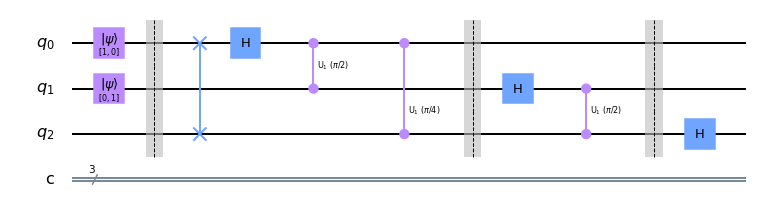

In [50]:
backend = BasicAer.get_backend('unitary_simulator')
qc = QuantumCircuit(3, 3)

# let state be |10>
st = 2
qc.initialize([1, 0], 0)
qc.initialize([0, 1], 1)

        
n = 3

qc.barrier() # check if phase is 0 (2pi)
# QFT
w = pi
qc.swap(0, 2)
qc.h(0)
qc.cu1(w / 2, 0, 1)
qc.cu1(w / 4, 0, 2)
qc.barrier()
qc.h(1)
qc.cu1(w / 2, 1, 2)
qc.barrier()
qc.h(2)
qc.draw('mpl')

In [51]:
import cmath
job = execute(qc, backend)
result = job.result()
res = result.get_unitary(qc, decimals=3)
res = [x[0] for x in res]
# for QFT we get (2 * pi * k * st / (2 ** n) mod 2pi
for k in range(2 ** n):
    print("phase expected: {}, phase computed: {}".format((2 * pi * k * st / (2 ** n)) % (2 * pi), cmath.phase(res[k]) % (2 * pi)))

phase expected: 0.0, phase computed: 6.283185307179586
phase expected: 1.5707963267948966, phase computed: 1.5707963267948963
phase expected: 3.141592653589793, phase computed: 3.141592653589793
phase expected: 4.71238898038469, phase computed: 4.71238898038469
phase expected: 0.0, phase computed: 6.283185307179586
phase expected: 1.5707963267948966, phase computed: 1.5707963267948963
phase expected: 3.141592653589793, phase computed: 3.141592653589793
phase expected: 4.71238898038469, phase computed: 4.71238898038469
